The dataset was sourced form: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

Python Packages for analyzing and cleaning data:

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Inspection

Importing the dataset:

In [65]:
df = pd.read_csv("../../backend/data/housing-dataset.csv")
df.head(50)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,yes,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,no,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,yes,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,yes,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,no,furnished
5,10850000,7500,3,3,1,1,0,1,0,1,2,yes,semi-furnished
6,10150000,8580,4,3,4,1,0,0,0,1,2,yes,semi-furnished
7,10150000,16200,5,3,2,1,0,0,0,0,0,no,unfurnished
8,9870000,8100,4,1,2,1,1,1,0,1,2,yes,furnished
9,9800000,5750,3,2,4,1,1,0,0,1,1,yes,unfurnished


In [66]:
df.shape

(545, 13)

In [67]:
df.info

<bound method DataFrame.info of         price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking prefarea  \
0         

In [68]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [69]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad             int64
guestroom            int64
basement             int64
hotwaterheating      int64
airconditioning      int64
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

## Data Cleaning

Checking for null values:

In [79]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Value Encoding:

In [72]:
# Encoding boolean values from string to int (1 for yes, 0 for no)
boolean_columns = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]
df[boolean_columns].replace({"yes": 1, "no": 0}, inplace=True)

# Encoding furnishing status from string to int (0 for unfurnished, 1 for semi-furnished, 2 for furnished)
df["furnishingstatus"].replace({"unfurnished": 0, "semi-furnished": 1, "furnished": 2}, inplace=True)

/var/folders/12/9kkk6tqs47d4103npslj25_40000gn/T/ipykernel_6528/285196213.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[boolean_columns].replace({"yes": 1, "no": 0}, inplace=True)


In [77]:
# Changing prefarea individually
df['prefarea'].replace({'yes': 1, 'no': 0}, inplace=True)
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [78]:
df.dtypes

price               int64
area                int64
bedrooms            int64
bathrooms           int64
stories             int64
mainroad            int64
guestroom           int64
basement            int64
hotwaterheating     int64
airconditioning     int64
parking             int64
prefarea            int64
furnishingstatus    int64
dtype: object

Feature Engineering:

In [125]:
# Feature: Total Number of Rooms
df['total_rooms'] = df['bedrooms'] + df['bathrooms']

# Feature: Area per room
df['area_per_room'] = df['area'] / df['total_rooms']

# Feature: Number of Amenities
amenities = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning']
df['amenity_count'] = df[amenities].sum(axis=1)


In [126]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,total_rooms,area_per_room,amenity_count
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2,6,1236.666667,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2,8,1120.000000,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,5,1992.000000,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2,6,1250.000000,3
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2,5,1484.000000,4


Checking correlation between features:

<Axes: >

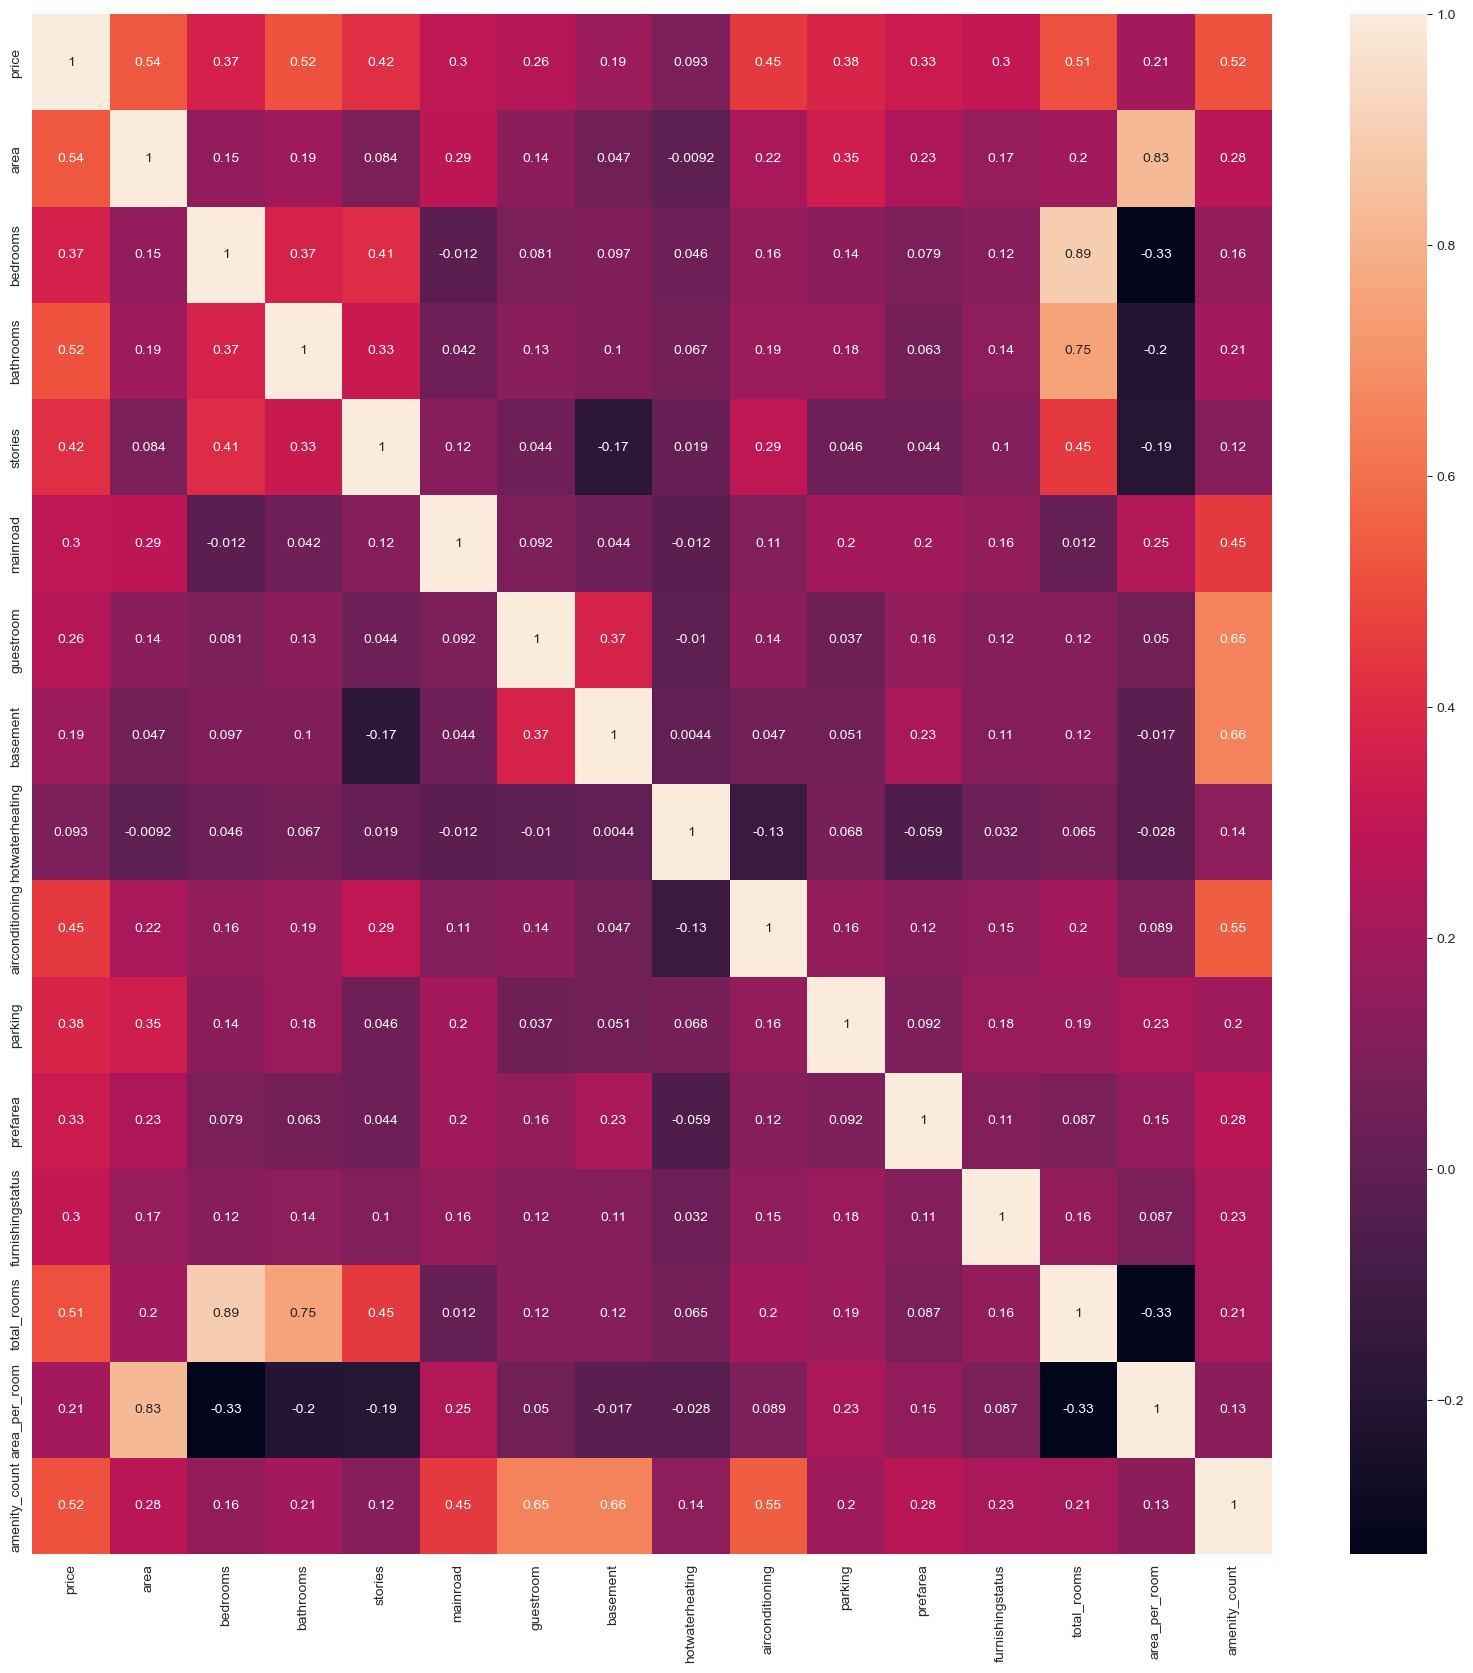

In [127]:
corr = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True)

In [128]:
corr_target = abs(corr["price"])
correlated_features = corr_target[corr_target>0.2]

names = [index for index, value in correlated_features.items()]

names.remove("price")

print(names)

['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus', 'total_rooms', 'area_per_room', 'amenity_count']


## Preprocessing

Feature Scaling

In [89]:
# Saving dataset after changes
df.to_csv('../../backend/data/housing-dataset.csv', index=False)

# Creating training dataset
train_df = pd.read_csv('../../backend/data/housing-dataset.csv')
train_df.to_csv('../../backend/data/training-housing-dataset.csv')


In [90]:
train_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [117]:
# Scaling Data
from sklearn.preprocessing import MinMaxScaler

scaled_columns = ["price", "area"]
scaler = MinMaxScaler()
train_df[scaled_columns] = scaler.fit_transform(df[scaled_columns])

In [118]:
# Saving scaling
train_df.to_csv('../../backend/data/training-housing-dataset.csv')

In [119]:
train_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,4,2,3,1,0,0,0,1,2,1,2
1,0.909091,0.502405,4,4,4,1,0,0,0,1,3,0,2
2,0.909091,0.571134,3,2,2,1,0,1,0,0,2,1,1
3,0.906061,0.402062,4,2,2,1,0,1,0,1,3,1,2
4,0.836364,0.396564,4,1,2,1,1,1,0,1,2,0,2


In [120]:
# Creating training and testing datasets
from sklearn.model_selection import train_test_split

X = train_df.drop(columns="price")
Y = train_df['price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Model training and testing

In [121]:
# Finding best alpha for model
from sklearn.linear_model import RidgeCV
ridge_cv_model = RidgeCV(alphas=[0.1, 1.0, 10.0])
ridge_cv_model.fit(X_train, Y_train)
print(ridge_cv_model.alpha_)

0.1


In [122]:
# Training the model
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)
model.fit(X_train, Y_train)

Ridge()

In [123]:
from sklearn.metrics import mean_squared_error, r2_score
# Making predictions with the model
Y_pred = model.predict(X_test)

# Evaluating model performance
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(mse)
print(r2)

0.013376620803960739
0.6469581844103287
